In [78]:
import pyfesom2 as pf
import xarray as xr
import os
import pandas as pd
from collections import OrderedDict
from itertools import product
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [46]:
# parameters cell
meshpath = "/Users/nkolduno/PYTHON/DATA/core2_meanz_mesh/"
abg = [50, 15, -90]

input_paths = [
    "/Users/nkolduno/PYTHON/DATA/output_7_8/",
    "/Users/nkolduno/PYTHON/DATA/output_7_10",
]
input_names = ['control', 'opt1']
years = range(1978, 1986)
figsize=(10, 5)
latitudes = [26.5, 45]
region = "Atlantic_MOC"
dpi = 200
ofile = None

In [16]:
if input_names is None:
    input_names = []
    for run in input_paths:
        run = os.path.join(run, '')
        input_names.append(run.split('/')[-2])

In [17]:
mesh = pf.load_mesh(meshpath, abg=abg, 
                    usepickle=True, usejoblib=False)

/Users/nkolduno/PYTHON/DATA/core2_meanz_mesh/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /Users/nkolduno/PYTHON/DATA/core2_meanz_mesh/pickle_mesh_py3_fesom2


In [18]:
amoc_time = OrderedDict()
# data_reference = pf.get_data(reference_path, variable, reference_years, mesh, depth = depth, silent=True)
for exp_path, exp_name  in zip(input_paths, input_names):
    amoc_time[exp_name] = {}
    amoc_time[exp_name]['data'] = pf.get_data(exp_path, 'w', years, mesh, how=None, compute=False, silent=True)

In [34]:
moc = {}
mask=pf.get_mask(mesh, region)
for key, value in amoc_time.items():
    moc[key] = {}
    moc[key]['data'] = []
    for ttime in range(value['data'].shape[0]):
        lats, moc_time = pf.xmoc_data(mesh, value['data'][ttime, :, :], mask = mask)
        moc[key]['data'].append(moc_time)
        moc[key]['lats'] = lats

In [47]:
idx = []
for latitude in latitudes:
    idx.append( (np.abs(lats - latitude)).argmin() )

In [85]:
amoc_at_latitudes = {}
for latitude in latitudes:
    amoc_at_latitudes[latitude] = {}
    idx = (np.abs(lats - latitude)).argmin()
    for exp_name, exp_data in moc.items():
        amoc_lat = []
        amoc_at_latitudes[latitude][exp_name] = {}
        for i in range(len(exp_data['data'])): 
            amoc_lat.append((exp_data['data'][i][idx,:].max()))
        amoc_at_latitudes[latitude][exp_name]['data'] = amoc_lat


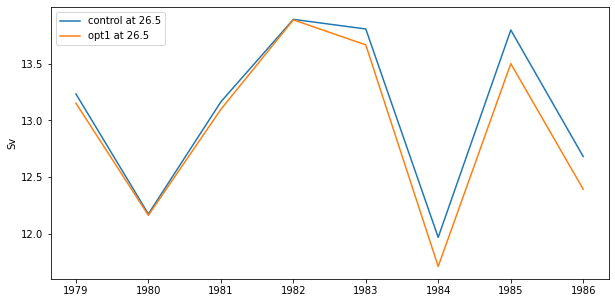

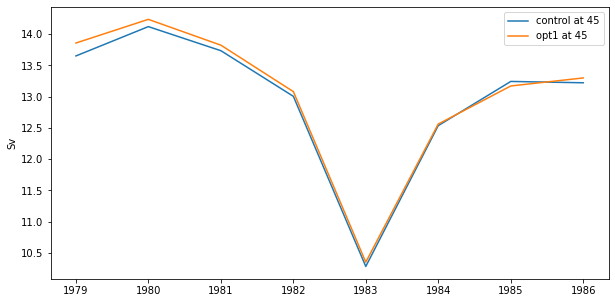

In [97]:
for latitude, latitude_data in amoc_at_latitudes.items():
    fig, ax = plt.subplots(1,1,figsize=figsize)
    for exp_name in amoc_time:
        ttime = amoc_time[exp_name]['data'].time
        ax.plot(ttime, latitude_data[exp_name]['data'], label = f"{exp_name} at {latitude}")
    plt.legend()
    plt.ylabel('Sv')
    if ofile is not None:
        ofile_long = f"{ofile}_{latitude}.png"
        plt.savefig(ofile_long, dpi = dpi)
        os.system(f'convert {ofile_long} -trim {ofile_long}_trimmed.png')
        os.system(f'mv {ofile_long}_trimmed.png {ofile_long}')